# Reinforcement Learning

# 3. Online evaluation

This notebook presents the online evaluation of a policy by **Monte-Carlo learning** and **TD learning**.

In [1]:
import numpy as np

In [2]:
from model import Maze, Walk, TicTacToe, Nim, ConnectFour
from agent import Agent, OnlineEvaluation
from dynamic import PolicyEvaluation

## To do

* Complete the class ``MCLearning`` and test it on the random walk.
* Compare with the exact solution obtained by Dynamic Programming.<br> You might plot the [Spearman's correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between both value functions with respect to the training time.
* Do the same with ``TDLearning``.

## Monte-Carlo learning

In [4]:
class MCLearning(OnlineEvaluation):
    """Online evaluation by Monte-Carlo."""
    # gain_k = r_k + gamma * gain_k+1
    # diff = (gain_k - Value_k)
    # Value_k <- Value_k + (1/nb_visites) * diff
        
    def update_values(self, state=None, horizon=100):
        """Update the values from one episode."""
        stop, states, rewards = self.get_episode(state=state, horizon=horizon)
        gain = 0
        # backward update
        # remove final state
        states.pop()
        for state, reward in zip(reversed(states), reversed(rewards)):
            self.add_state(state)
            code = self.model.encode(state)
            self.count[code] += 1 # Number of visits
            # to be modified
            # begin
            gain = reward + self.gamma * gain
            # end 
            # diff = (gain_k - Value_k)
            diff = gain - self.value[code]
            count = self.count[code]        
            # Value_k <- Value_k + (1/nb_visites) * diff
            self.value[code] += diff / count # Incremental mean
            

## TD learning

In [5]:
# Possible function to use
# reward, stop = self.model.step(action)
# next_state = self.model.get_next_state(state, action)
# code = self.model.encode(state)
# diff = self.model.get_reward(state) + self.gamma * self.value[code]


class TDLearning(OnlineEvaluation):
    """Online evaluation by TD learning."""
        
    def update_values(self, state=None, horizon=100):
        """Update values online from one episode."""
        self.model.reset(state)
        
        for t in range(horizon):
            # to be completed
            state = self.model.state
            if not self.model.is_terminal(state):
                action = self.get_action(state)
                reward, stop = self.model.step(action) # change the curr state inplace

                    
                    
                next_state = self.model.state

                # Code
                code = self.model.encode(state)
                code_next_state = self.model.encode(next_state)

                # TD diff update
                diff = reward + self.gamma * self.value[code_next_state] - self.value[code]
                
                self.count[code] += 1
                count = self.count[code]
            
                self.value[code] += diff/count
                
                if stop:
                    break

## MC Learning on Walk

In [6]:
walk = Walk()
algo = MCLearning(walk, policy='random', gamma=0.9)

In [7]:
n_episodes = 100
for t in range(n_episodes):
    algo.update_values()

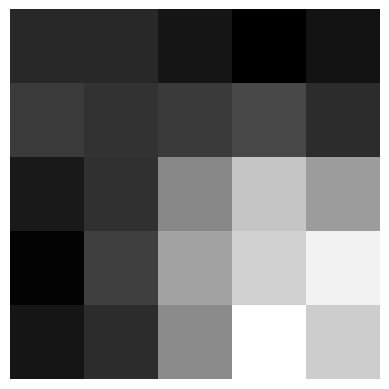

In [8]:
values = algo.get_values()
walk.display_values(values)

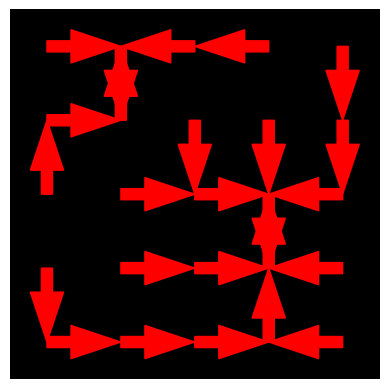

In [9]:
policy = algo.get_policy()
walk.display_policy(policy)

## TD Learning on Walk

In [10]:
walk = Walk()
algo = TDLearning(walk, policy='random', gamma=0.9)

In [13]:
%pip install tqdm 
from tqdm import tqdm

n_episodes = 1000
for t in range(n_episodes):
    algo.update_values()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


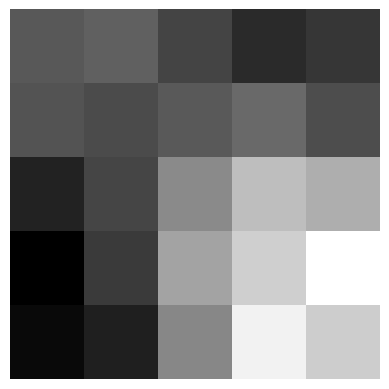

In [14]:
values = algo.get_values()
walk.display_values(values)

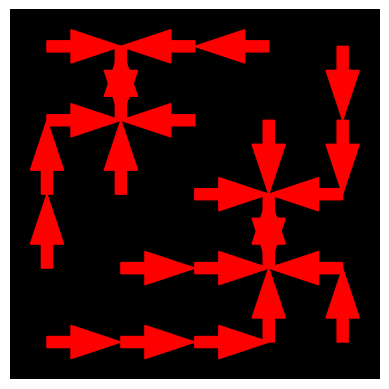

In [15]:
policy = algo.get_policy()
walk.display_policy(policy)

## To do

Test the other environments:
* The maze: can you find the exit after policy improvement?<br> You might adapt the number of episodes used for training.
* The games (Tic-Tac-Toe, Nim, Connect Four): can you beat a random player after policy improvement? a player with the one-step policy?<br> Comment the results.

## Maze

In [16]:
maze_map = np.load('maze.npy')

In [17]:
init_state = (1, 0)
exit_state = (1, 20)
Maze.set_parameters(maze_map, init_state, [exit_state])

In [18]:
maze = Maze()

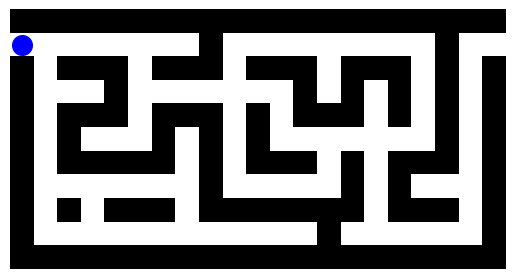

In [19]:
maze.display()

## MC Learning on Maze

In [20]:
agent = Agent(maze)
algo = MCLearning(maze, policy='random')

In [21]:
from tqdm import tqdm

n_episodes = 100

for t in tqdm(range(n_episodes), desc="Updating Values"):
    algo.update_values(state='random')


Updating Values: 100%|██████████| 100/100 [00:00<00:00, 235.25it/s]


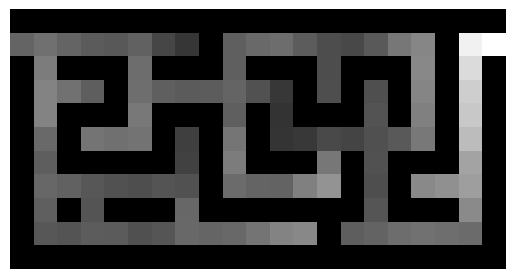

In [22]:
values = algo.get_values()
maze.display_values(values)

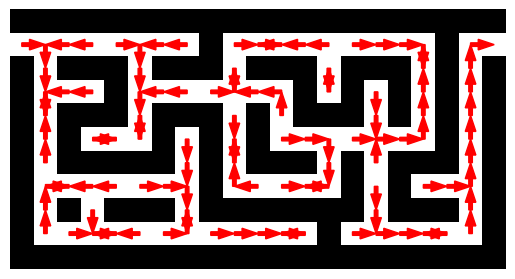

In [23]:
policy = algo.get_policy()
maze.display_policy(policy)

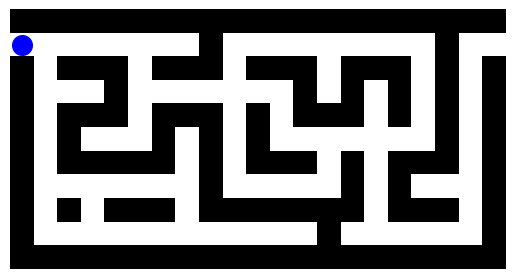

In [24]:
agent = Agent(maze, policy)
stop, states, rewards = agent.get_episode()
animation = maze.display(states)
animation

## TD Learning on Maze

In [25]:
agent = Agent(maze)
algo = TDLearning(maze, policy='random')

In [26]:
from tqdm import tqdm

n_episodes = 100

for t in tqdm(range(n_episodes), desc="Updating Values"):
    algo.update_values(state='random')

Updating Values: 100%|██████████| 100/100 [00:00<00:00, 204.36it/s]


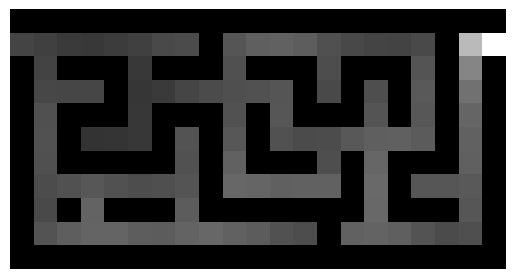

In [27]:
values = algo.get_values()
maze.display_values(values)

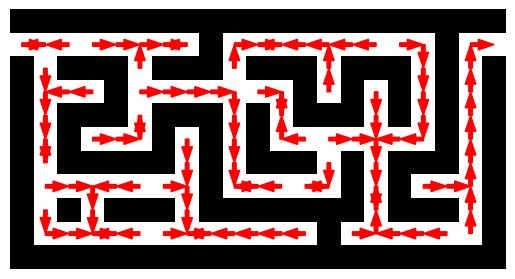

In [28]:
policy = algo.get_policy()
maze.display_policy(policy)

## Games

In [29]:
Game = TicTacToe

In [30]:
# random player
game = Game(play_first=True)
algo = MCLearning(game, policy='random')

In [31]:
from tqdm import tqdm

n_episodes = 1000

for t in tqdm(range(n_episodes), desc="Updating Values"):
    algo.update_values(state='random')


Updating Values: 100%|██████████| 1000/1000 [20:05<00:00,  1.21s/it] 


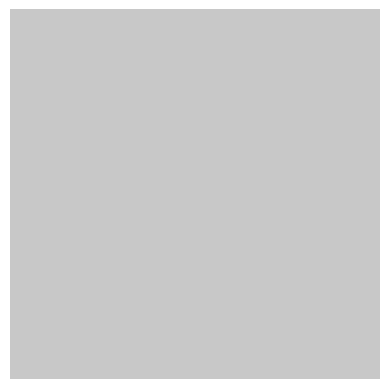

In [34]:
agent = Agent(game)
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

In [35]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([30, 11, 59], dtype=int64))